In [7]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import colorsys
sns.set(style="white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [13]:
help(df['brand'].value_counts().plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame using the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot
 |      - 'hexbin' : hexbin pl

## Número de veículos pertencentes a cada marca

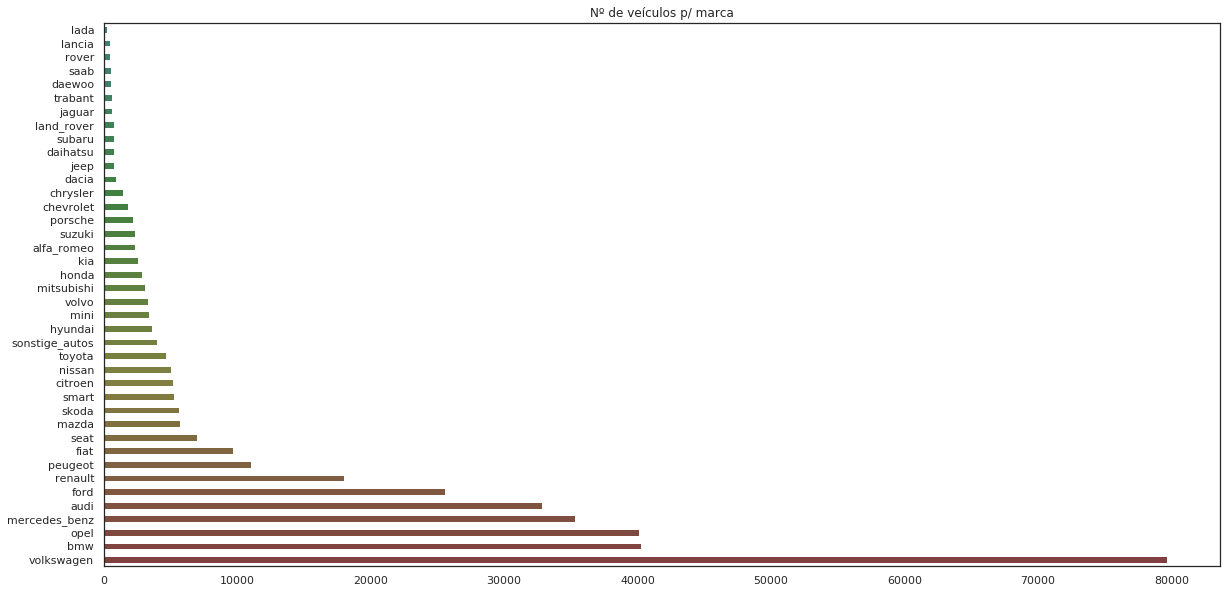

In [16]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca

# Criando a lista de cores
num = len(df.brand.value_counts().index)
listaHSV = [(x*0.5/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

ax = df['brand'].value_counts().plot(kind='barh', figsize=(20,10), color=listaRGB, x='Nº de veículos', y='Marca', title='Nº de veículos p/ marca')
fig = ax.get_figure()

In [17]:
# Salvando o plot
fig.savefig(("plots/Analise2/brand-vehicleCount.png"))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

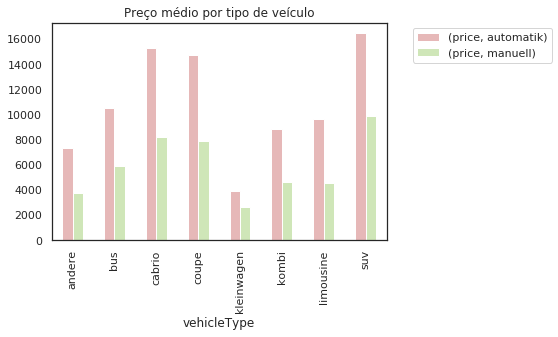

In [66]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

# Agrupando os dados
df2 = df[['vehicleType', 'gearbox','price']][df['price'] < 100000].groupby(['vehicleType', 'gearbox']).mean().unstack(level=1)

# Quantidade
num = len(df2.price.index)

# Criando a lista de cores
listaHSV = [(x*2.0/num, 0.2, 0.9) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico
ax1 = df2.plot(kind='bar', color=listaRGB, title='Preço médio por tipo de veículo')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

fig = ax1.get_figure()

In [65]:
# Salvando o plot
fig.savefig("plots/Analise2/vehicletype-gearbox-price.png")